# Unsupervised Learning using Scikit Learn - Machine Learning with Python

\*Includes adaptions from jovian.ai


The following topics are covered in this tutorial:

- Overview of unsupervised learning algorithms in Scikit-learn
- Anomaly Detection algorithms: Local Outlier Factor (LOF)
- Clustering algorithms: K Means, DBScan, Hierarchical clustering etc.
- Dimensionality reduction (PCA) and manifold learning (t-SNE)


## Introduction to Unsupervised Learning

Unsupervised machine learning refers to the category of machine learning techniques where models are trained on a dataset without labels. Unsupervised learning is generally use to discover patterns in data and reduce high-dimensional data to fewer dimensions. Here's how unsupervised learning fits into the landscape of machine learning algorithms([source](https://medium.datadriveninvestor.com/machine-learning-in-10-minutes-354d83e5922e)):

<img src="https://miro.medium.com/max/842/1*tlQwBmbL6RkuuFq8OPJofw.png" width="640">

Here are the topics in machine learning that we're studying in this course ([source](https://vas3k.com/blog/machine_learning/)): 

<img src="https://i.imgur.com/DZSXb0m.jpeg" width="640">


## Outlier and Anomaly Detection

**Outliers** are data points that deviate significantly from the majority of the data in a dataset. They are unusual values that are not in line with the general distribution of the data. Outliers can be the result of variability in the measurement, experimental errors or data entry errors. They could also represent a novel or rare event.

**Anomalies** are patterns in data that do not conform to a well-defined notion of normal behavior. Anomalies are similar to outliers but are often considered in the context of temporal or complex data. Anomaly detection is particularly relevant in sequential data or in situations where the data is generated by complex systems, such as cyber-security, fraud detection, or health monitoring.

Detecting outliers and anomalies is important for several reasons:

1. **Data Cleaning**: Outliers can arise due to errors in data collection or entry, and identifying these can help clean the data and improve the quality of the dataset.

2. **Robustness**: Machine learning models can be sensitive to outliers. Detecting and handling outliers can make models more robust and improve their generalization.

3. **Insights**: Outliers and anomalies can sometimes be the most interesting part of the data. For example, in fraud detection, the fraudulent activities are the anomalies that we want to detect.

4. **Safety**: In critical systems, such as healthcare monitoring or aviation, anomaly detection can provide early warnings about potentially dangerous conditions.

Several popular methods for outlier and anomaly detection include Z-Score, Local Outlier Factor (LOF), Mahalanobis Distance and One-Class SVM.

### Z-Score Method

The Z-Score, also known as the standard score, indicates how many standard deviations an element is from the mean. A Z-Score can be calculated for each data point to determine if it's an outlier.

#### Steps to Calculate Z-Score:

1. Calculate the mean (μ) and standard deviation (σ) of the feature / variable.
2. For each data point (x), calculate the Z-Score
3. Determine a threshold Z-Score (e.g., 3 or -3). Data points with a Z-Score beyond this threshold are considered outliers.

#### Z-Score Formula

$$ Z = \frac{(X - \mu)}{\sigma} $$

where:
- $X$ is the data point.
- $\mu$ is the mean of the dataset.
- $\sigma$ is the standard deviation of the dataset.

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set_style('darkgrid')
%matplotlib inline

In [83]:
# Sample data
data = np.array([10, 12, 12, 13, 12, 11, 14, 13, 15, 10, 10, 100, 12, 14, 14])

In [84]:
# Calculate mean and standard deviation
mean = np.mean(data)
std_dev = np.std(data)

In [85]:
# Calculate Z-Scores
z_scores = (data - mean) / std_dev

In [86]:
# Set a threshold and detect outliers
threshold = 3
outliers = np.where(np.abs(z_scores) > threshold)

print(f"Outlier indices: {outliers[0]}")

Outlier indices: [11]


### Local Outlier Factor (LOF)

LOF is an algorithm that detects outliers by measuring the local deviation of a given data point concerning its neighbors. It considers the density of a data point's neighborhood and compares it to the density of its neighbors' neighborhoods.

![lof](../assets/lof.png)

#### Steps to Use LOF:

1. Choose the number of neighbors (k).
2. Calculate the reachability distance and local reachability density for each point.
3. Calculate the LOF score for each point. A score significantly larger than 1 indicates an outlier.

#### Reachability Distance & Local Reachability Density

For points $A$ and $B$:

$$ reach\_dist_k(A, B) = \max\{ \text{dist}(A,B),\ k\text{-distance}(B) \} $$

The local reachability density (lrd) of $A$ is:

$$ lrd_k(A) = \left( \frac{1}{|N_k(A)|} \sum_{B \in N_k(A)} reach\_dist_k(A,B) \right)^{-1} $$

#### LOF Formula

$$ LOF_k(A) = \frac{\sum_{B \in N_k(A)} \frac{lrd(B)}{lrd(A)}}{|N_k(A)|} $$

where:
- $N_k(A)$ is the set of $k$ nearest neighbors of $A$.
- $lrd$ is the local reachability density.

#### Interpreting LOF Scores

- $LOF \approx 1$: Point has similar density to its neighbors (likely normal).
- $LOF > 1$: Point is less dense than neighbors; the larger the value, the more outlier-like it is.
- Practical cutoffs depend on the dataset, but values above ~1.5–2 are commonly treated as outliers, while values below 1 suggest inliers.

### Mahalanobis Distance

Mahalanobis Distance is a multivariate measure of the distance between a point and a distribution. It's an effective way to detect outliers, especially when dealing with multidimensional data.

#### Steps to Calculate Mahalanobis Distance:

1. Calculate the covariance matrix of the dataset.
2. Calculate the inverse of the covariance matrix.
3. For each data point (x), calculate its Mahalanobis Distance using the formula: D² = (x - μ)ᵀ * S⁻¹ * (x - μ), where S⁻¹ is the inverse covariance matrix.

#### Mahalanobis Distance Formula

$$ D^2 = (x - \mu)^T S^{-1} (x - \mu) $$

where:
- $x$ is the data point.
- $\mu$ is the mean of the dataset.
- $S$ is the covariance matrix of the dataset.
- $S^{-1}$ is the inverse of the covariance matrix.

In [87]:
from sklearn.neighbors import LocalOutlierFactor

In [88]:
# Sample data
X = [[10, 10], [12, 12], [11, 11], [14, 14], [100, 100], [14, 14]]

In [89]:
clf = LocalOutlierFactor(n_neighbors=2)
outlier_labels = clf.fit_predict(X)

In [90]:
# -1 indicates an outlier
print(f"Outlier labels: {outlier_labels}")

Outlier labels: [ 1  1  1  1 -1  1]


In [91]:
# Outlier detection using Mahalanobis distance
from scipy.stats import chi2

In [92]:
X = np.array([[10, 10], [12, 12], [11, 11], [14, 14], [100, 100], [14, 14]])
# Calculate mean and covariance matrix

mean = np.mean(X, axis=0)
cov_matrix = np.cov(X.T)
inv_cov_matrix = np.linalg.inv(cov_matrix)
cov_matrix

array([[1287.36666667, 1287.36666667],
       [1287.36666667, 1287.36666667]])

In [93]:
inv_cov_matrix

array([[ 6.99660748e+12, -6.99660748e+12],
       [-6.99660748e+12,  6.99660748e+12]])

In [94]:
# Calculate Mahalanobis Distance for each data point
mahalanobis_distances = np.array([np.dot(np.dot((x - mean), inv_cov_matrix), (x - mean).T) for x in X])

In [95]:
# Compare with a critical value from the chi-squared distribution
critical_value = chi2.ppf((1-0.1), df=2)  # df is the number of dimensions
outliers = np.where(mahalanobis_distances > critical_value)

In [96]:
print(f"Outlier indices: {outliers[0]}")

Outlier indices: [4]


In [97]:
mahalanobis_distances

array([0.27671984, 0.21487088, 0.24481879, 0.16083442, 5.22789171,
       0.16083442])

### One-Class SVM

One-Class SVM is an extension of the SVM algorithm that has been adapted for anomaly detection. The goal of One-Class SVM is to find a function that captures the region where the majority of the data points reside. Data points that do not fit within this region are considered anomalies.

### How One-Class SVM Works

One-Class SVM works by mapping the input data points into a high-dimensional feature space using a kernel function. It then tries to separate the data from the origin with maximum margin. This results in a decision boundary around the normal data points. Points that fall outside this boundary are deemed anomalies.

### Parameters of One-Class SVM

- `nu`: An upper bound on the fraction of training errors and a lower bound of the fraction of support vectors. It must be between 0 and 1. Essentially, it corresponds to the proportion of outliers you expect in your data.
- `kernel`: Specifies the kernel type to be used in the algorithm. It can be `linear`, `poly`, `rbf`, `sigmoid`, `precomputed`, or a callable.
- `gamma`: Kernel coefficient for `rbf`, `poly`, and `sigmoid`. It controls the influence of individual training samples - this affects the smoothness of the model. A low value of gamma will give a more flexible decision boundary.

In [98]:
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM

In [99]:
np.random.seed(42)
X_normal = np.random.randn(100, 2)
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.vstack([X_normal, X_outliers])

In [100]:
clf = OneClassSVM(nu=0.01, kernel="rbf", gamma=0.1)
clf.fit(X_normal)

OneClassSVM(gamma=0.1, nu=0.01)

In [101]:
y_pred = clf.predict(X)

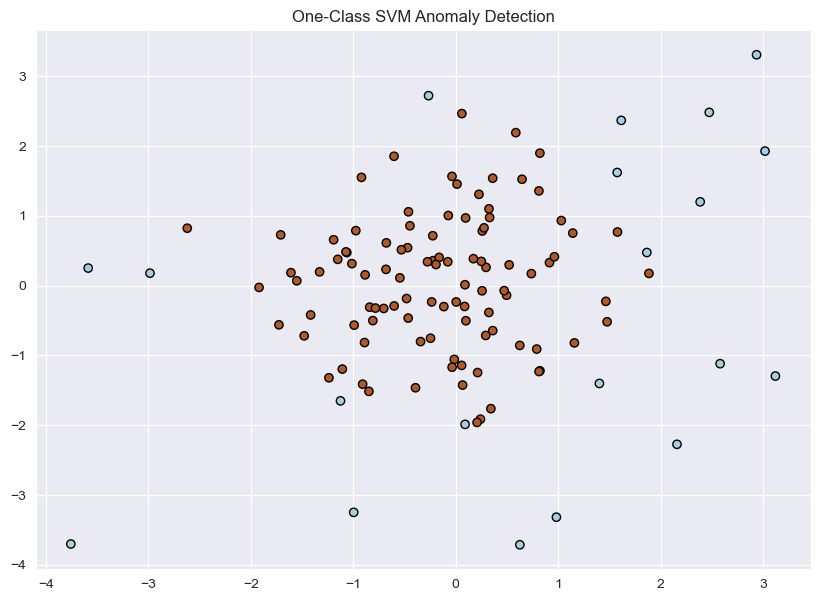

In [102]:
plt.figure(figsize=(10, 7))
plt.title("One-Class SVM Anomaly Detection")
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=plt.cm.Paired, edgecolors='k')

In [103]:
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

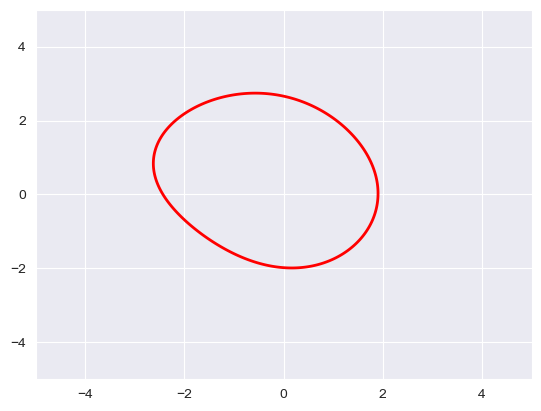

In [104]:
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')

plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.show()



## Dimensionality Reduction and Manifold Learning

In machine learning problems, we often encounter datasets with a very large number of dimensions (features or columns). Dimensionality reduction techniques are used to reduce the number of dimensions or features within the data to a manageable or convenient number. 


Applications of dimensionality reduction:

* Reducing size of data without loss of information
* Training machine learning models efficiently
* Visualizing high-dimensional data in 2/3 dimensions


### Principal Component Analysis (PCA)

Principal component is a dimensionality reduction technique that uses linear projections of data to reduce their dimensions, while attempting to maximize the variance of data in the projection. Watch this video to learn how PCA works: https://www.youtube.com/watch?v=FgakZw6K1QQ&t=212s

#### How PCA Works

1. Standardize the data.
2. Compute the covariance matrix of the data.
3. Calculate the eigenvalues and eigenvectors of the covariance matrix.
4. Sort the eigenvectors by decreasing eigenvalues and choose the first k eigenvectors. This forms a new matrix.
5. Transform the original dataset using this eigenvector matrix to obtain the new k-dimensional feature subspace.

#### PCA Formula

PCA involves the eigen decomposition of the data covariance matrix or singular value decomposition of the data matrix, usually after mean centering the data for each attribute.

The covariance matrix of a data matrix $X$ is given by:

$$ S = \frac{1}{n-1} X^T X $$

where $n$ is the number of data points.

The eigen decomposition of $S$ is then computed to obtain the principal components. The eigenvectors of $S$ correspond to the directions of maximum variance, ordered by the corresponding eigenvalues in descending order.

#### PCA example

Here's a visual example of PCA to reduce 2D data to 1D:

<img src="https://i.imgur.com/ZJ7utlo.png" width="480">

Let's apply Principal Component Analysis to the Iris dataset.

<img src="../assets/iris.png" width="480">

In [105]:
iris_df = sns.load_dataset('iris')
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [106]:
numeric_cols = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
numeric_cols

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [107]:
from sklearn.decomposition import PCA

In [108]:
?PCA

Init signature:
PCA(
    n_components=None,
    *,
    copy=True,
    whiten=False,
    svd_solver='auto',
    tol=0.0,
    iterated_power='auto',
    n_oversamples=10,
    power_iteration_normalizer='auto',
    random_state=None,
)
Docstring:     
Principal component analysis (PCA).

Linear dimensionality reduction using Singular Value Decomposition of the
data to project it to a lower dimensional space. The input data is centered
but not scaled for each feature before applying the SVD.

It uses the LAPACK implementation of the full SVD or a randomized truncated
SVD by the method of Halko et al. 2009, depending on the shape of the input
data and the number of components to extract.

It can also use the scipy.sparse.linalg ARPACK implementation of the
truncated SVD.

Notice that this class does not support sparse input. See
:class:`TruncatedSVD` for an alternative with sparse data.

Read more in the :ref:`User Guide <PCA>`.

Parameters
----------
n_components : int, float or 'mle', def

In [109]:
pca = PCA(n_components=2)

In [110]:
pca.fit(iris_df[numeric_cols])

PCA(n_components=2)

In [111]:
pca

PCA(n_components=2)

In [112]:
transformed = pca.transform(iris_df[numeric_cols])

/opt/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

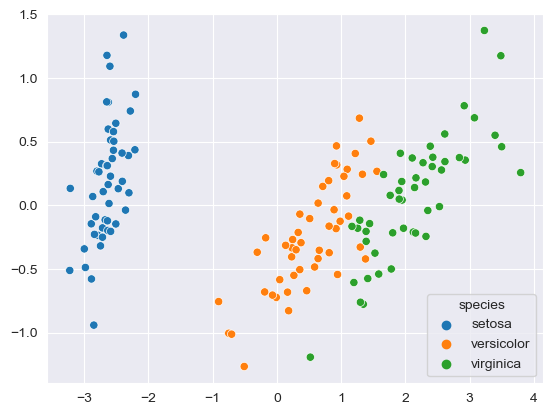

In [113]:
sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=iris_df['species']);

As you can see, the PCA algorithm has done a very good job of separating different species of flowers using just 2 measures.

Learn more about Principal Component Analysis here: https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

### t-Distributed Stochastic Neighbor Embedding (t-SNE)

Manifold learning is an approach to non-linear dimensionality reduction. Algorithms for this task are based on the idea that the dimensionality of many data sets is only artificially high. Scikit-learn provides many algorithms for manifold learning: https://scikit-learn.org/stable/modules/manifold.html . A commonly-used manifold learning technique is t-Distributed Stochastic Neighbor Embedding or t-SNE, used to visualize high dimensional data in one, two or three dimensions. 

#### How t-SNE Works

1. Measure the similarity between pairs of instances in the high-dimensional space and in the low-dimensional space.
2. Use these similarities to create a probability distribution that represents similarities between instances.
3. Minimize the divergence between these two distributions with respect to the positions of the points in the map.

#### t-SNE Formula

t-SNE first computes probabilities $p_{ij}$ that are proportional to the similarity of objects $i$ and $j$ in the high-dimensional space, using a Gaussian distribution centered at object $i$:

$$ p_{j|i} = \frac{\exp(-||x_i - x_j||^2 / 2\sigma_i^2)}{\sum_{k \neq i} \exp(-||x_i - x_k||^2 / 2\sigma_i^2)} $$

$$ p_{ij} = \frac{p_{j|i} + p_{i|j}}{2n} $$

In the low-dimensional space, t-SNE uses a Student-t distribution to compute similar probabilities $q_{ij}$:

$$ q_{ij} = \frac{(1 + ||y_i - y_j||^2)^{-1}}{\sum_{k \neq l} (1 + ||y_k - y_l||^2)^{-1}} $$

t-SNE then minimizes the Kullback-Leibler divergence between the distributions $P$ and $Q$ to find a good representation of the data in the low-dimensional space:

$$ KL(P||Q) = \sum_i \sum_j p_{ij} \log \frac{p_{ij}}{q_{ij}} $$

#### t-SNE Example

Here's a visual representation of t-SNE applied to visualize 2 dimensional data in 1 dimension:

<img src="https://i.imgur.com/rVMAaix.png" width="360">


Here's a video explaning how t-SNE works: https://www.youtube.com/watch?v=NEaUSP4YerM

In [114]:
from sklearn.manifold import TSNE

In [115]:
?TSNE

Init signature:
TSNE(
    n_components=2,
    *,
    perplexity=30.0,
    early_exaggeration=12.0,
    learning_rate='auto',
    n_iter=1000,
    n_iter_without_progress=300,
    min_grad_norm=1e-07,
    metric='euclidean',
    metric_params=None,
    init='pca',
    verbose=0,
    random_state=None,
    method='barnes_hut',
    angle=0.5,
    n_jobs=None,
)
Docstring:     
T-distributed Stochastic Neighbor Embedding.

t-SNE [1] is a tool to visualize high-dimensional data. It converts
similarities between data points to joint probabilities and tries
to minimize the Kullback-Leibler divergence between the joint
probabilities of the low-dimensional embedding and the
high-dimensional data. t-SNE has a cost function that is not convex,
i.e. with different initializations we can get different results.

It is highly recommended to use another dimensionality reduction
method (e.g. PCA for dense data or TruncatedSVD for sparse data)
to reduce the number of dimensions to a reasonable amount (e

In [116]:
tsne = TSNE(n_components=2)

In [117]:
transformed = tsne.fit_transform(iris_df[numeric_cols])

/opt/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

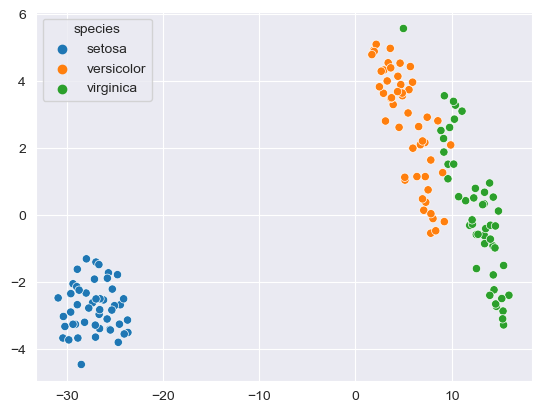

In [118]:
sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=iris_df['species']);

As you can see, the flowers from the same species are clustered very closely together. The relative distance between the species is also conveyed by the gaps between the clusters.

> **EXERCISE**: Use t-SNE to visualize the [MNIST handwritten digits dataset](https://www.kaggle.com/oddrationale/mnist-in-csv).

In [119]:
# Load and visualize MNIST data using t-SNE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Load the MNIST test data
print("Loading MNIST data...")
df = pd.read_csv("./mnist_test.csv")

# Display basic information about the dataset
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()[:10]}...")  # Show first 10 columns
print(f"First few labels: {df.iloc[:5, 0].values}")  # Show first 5 labels
print(f"First rows: {df.head(5)}")  # Show first 5 rows


Loading MNIST data...
Dataset shape: (10000, 785)
Columns: ['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9']...
First few labels: [7 2 1 0 4]
First rows:    label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      7    0    0    0    0    0    0    0    0    0  ...      0      0   
1      2    0    0    0    0    0    0    0    0    0  ...      0      0   
2      1    0    0    0    0    0    0    0    0    0  ...      0      0   
3      0    0    0    0    0    0    0    0    0    0  ...      0      0   
4      4    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 ro

Preprocessing data...

Plotting first 20 digits...


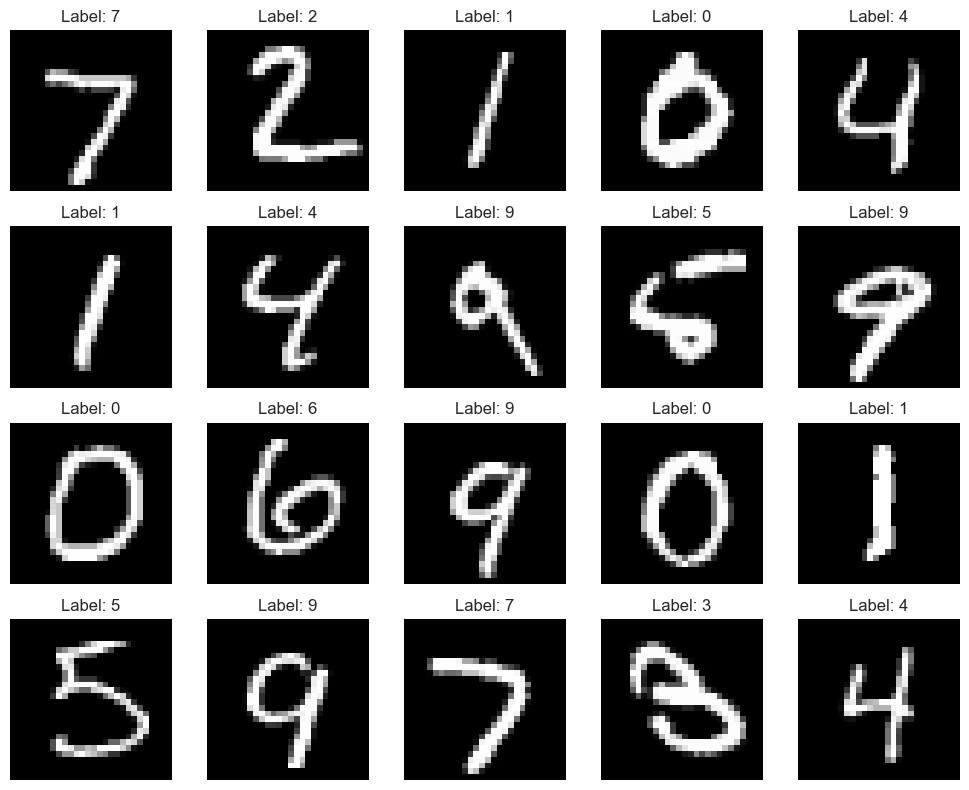

<Figure size 640x480 with 0 Axes>

In [120]:
# Separate features (pixel values) and labels
print("Preprocessing data...")
y = df["label"].values
X = df.drop("label", axis=1).values

# Plot MNIST digits
def plot_digits(images, labels, num_samples=10, cols=5):
    """
    Plot MNIST digits in a grid
    
    Parameters:
    images: array of flattened 784-pixel images
    labels: array of corresponding labels
    num_samples: number of samples to plot
    cols: number of columns in the grid
    """
    rows = int(np.ceil(num_samples / cols))
    
    fig, axes = plt.subplots(rows, cols, figsize=(10, 8))
    axes = axes.flatten() if rows > 1 else [axes] if cols == 1 else axes
    
    for i in range(num_samples):
        # Reshape the flattened image to 28x28
        image = images[i].reshape(28, 28)
        
        # Plot the image
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(f'Label: {labels[i]}')
        axes[i].axis('off')
    
    # Hide unused subplots
    for i in range(num_samples, len(axes)):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

# Plot the first 10 digits from the dataset
print("\nPlotting first 20 digits...")
plot_digits(X, y, num_samples=20)


plt.tight_layout()
plt.show()

Standardizing data...
Running t-SNE (this may take a few minutes)...


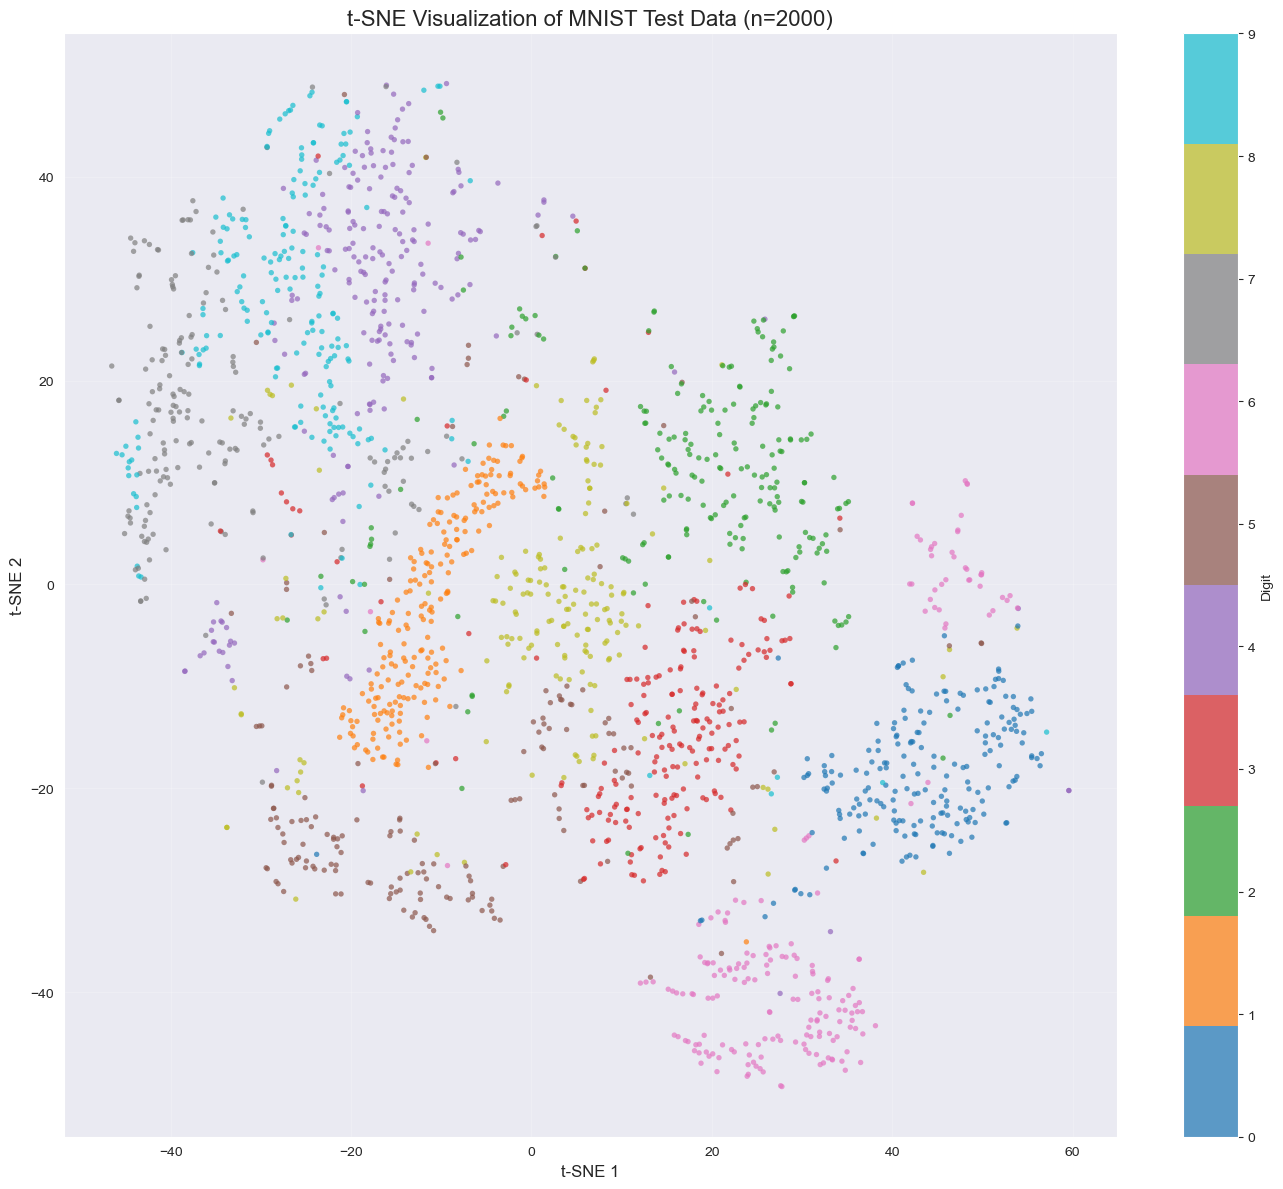

In [121]:


# Take a sample of the data for faster computation
sample_size = 2000  # Using a larger sample for better visualization
np.random.seed(42)
indices = np.random.permutation(len(X))[:sample_size]
X_sample = X[indices]
y_sample = y[indices]

# Standardize the data
print("Standardizing data...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sample)

# Apply t-SNE
print("Running t-SNE (this may take a few minutes)...")
tsne = TSNE(
##########!!!!! ADD YOUR TSNE PARAMETERS HERE !!!!!!##########    
)
X_tsne = tsne.fit_transform(X_scaled)

# Plot the results
plt.figure(figsize=(14, 12))
scatter = plt.scatter(
    X_tsne[:, 0],
    X_tsne[:, 1],
    c=y_sample,
    cmap="tab10",
    alpha=0.7,
    s=15,
    edgecolors="none"
)
plt.colorbar(scatter, label="Digit", ticks=range(10))
plt.title("t-SNE Visualization of MNIST Test Data (n={})".format(sample_size), fontsize=16)
plt.xlabel("t-SNE 1", fontsize=12)
plt.ylabel("t-SNE 2", fontsize=12)
plt.grid(True, alpha=0.2)
plt.tight_layout()

## Clustering 

Clustering is the process of grouping objects from a dataset such that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups ([Wikipedia](https://en.wikipedia.org/wiki/Cluster_analysis)). Scikit-learn offers several clustering algorithms. You can learn more about them here: https://scikit-learn.org/stable/modules/clustering.html


Here is a visual representation of clustering:

<img src="https://i.imgur.com/VXPgw6H.png" width="400">



Here are some real-world applications of clustering:

* Customer segmentation 
* Product recommendation
* Feature engineering
* Anomaly/fraud detection
* Taxonomy creation


We'll use the [Iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) to study some of the clustering algorithms available in `scikit-learn`. It contains various measurements for 150 flowers belonging to 3 different species.

In [122]:
iris_df = sns.load_dataset('iris')

In [123]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


/opt/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

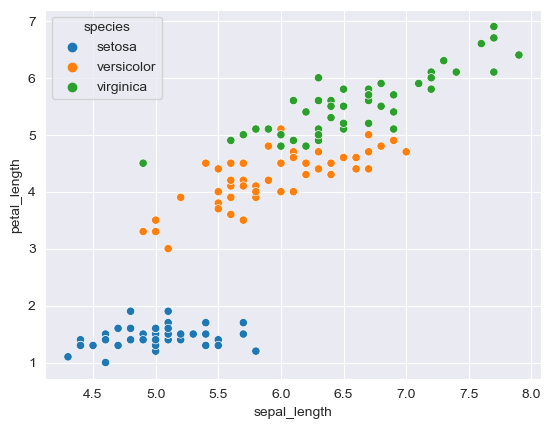

In [124]:
sns.scatterplot(data=iris_df, x='sepal_length', y='petal_length', hue='species');

We'll attempt to cluster observations using numeric columns in the data. 

In [125]:
numeric_cols = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

In [126]:
X = iris_df[numeric_cols]

### K Means Clustering

The K-means algorithm attempts to classify objects into a pre-determined number of clusters by finding optimal central points (called centroids) for each cluster. Each object is classifed as belonging the cluster represented by the closest centroid.

<img src="https://miro.medium.com/max/1400/1*rw8IUza1dbffBhiA4i0GNQ.png" width="640">

Here's how the K-means algorithm works:

1. Pick K random objects as the initial cluster centers.
2. Classify each object into the cluster whose center is closest to the point.
3. For each cluster of classified objects, compute the centroid (mean).
4. Now reclassify each object using the centroids as cluster centers.
5. Calculate the total variance of the clusters (this is the measure of goodness).
6. Repeat steps 1 to 6 a few more times and pick the cluster centers with the lowest total variance.

The goal of K-Means is to minimize the within-cluster sum of squares (WCSS), which is defined as:

$$ WCSS = \sum_{i=1}^{k} \sum_{x \in C_i} ||x - \mu_i||^2 $$

where $C_i$ is the set of points in cluster $i$ and $\mu_i$ is the centroid of cluster $i$.

![kmeans](../assets/kmeans.png)

Here's a video showing the above steps: https://www.youtube.com/watch?v=4b5d3muPQmA

Let's apply K-means clustering to the Iris dataset.

In [127]:
from sklearn.cluster import KMeans

In [128]:
model = KMeans(n_clusters=3, random_state=42)

In [129]:
model.fit(X)

/opt/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

We can check the cluster centers for each cluster.

In [130]:
model.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

We can now classify points using the model.

In [131]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [132]:
preds = model.predict(X)
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

/opt/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


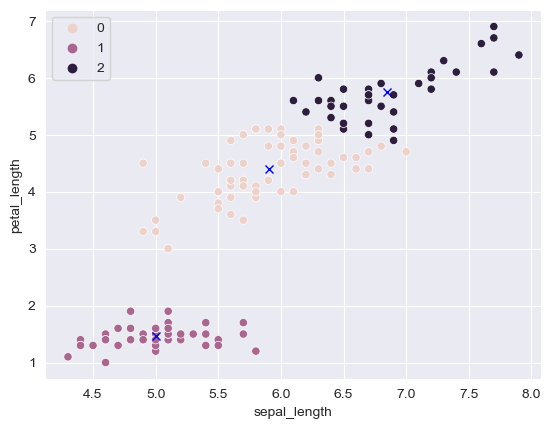

In [133]:
sns.scatterplot(data=X, x='sepal_length', y='petal_length', hue=preds);
centers_x, centers_y = model.cluster_centers_[:,0], model.cluster_centers_[:,2]
plt.plot(centers_x, centers_y, 'xb')

As you can see, K-means algorithm was able to classify (for the most part) different specifies of flowers into separate clusters. Note that we did not provide the "species" column as an input to `KMeans`.

We can check the "goodness" of the fit by looking at `model.inertia_`, which contains the sum of squared distances of samples to their closest cluster center. Lower the inertia, better the fit.

In [134]:
model.inertia_

78.85144142614601

Let's try creating 6 clusters.

In [135]:
model = KMeans(n_clusters=6, random_state=42).fit(X)

/opt/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [136]:
preds = model.predict(X)
preds

array([3, 0, 0, 0, 3, 3, 0, 3, 0, 0, 3, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 0, 0, 3, 3, 3, 0, 0, 3, 3, 3, 0, 0, 3, 3, 0, 3, 3, 0, 0, 3,
       3, 0, 3, 0, 3, 0, 5, 5, 5, 4, 5, 5, 5, 4, 5, 4, 4, 5, 4, 5, 4, 5,
       5, 4, 5, 4, 5, 4, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 5, 4, 5, 5, 5,
       4, 4, 4, 5, 4, 4, 4, 4, 4, 5, 4, 4, 1, 5, 2, 1, 1, 2, 4, 2, 1, 2,
       1, 1, 1, 5, 1, 1, 1, 2, 2, 5, 1, 5, 2, 5, 1, 2, 5, 5, 1, 2, 2, 2,
       1, 5, 5, 2, 1, 1, 5, 1, 1, 1, 5, 1, 1, 1, 5, 1, 1, 5], dtype=int32)

/opt/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


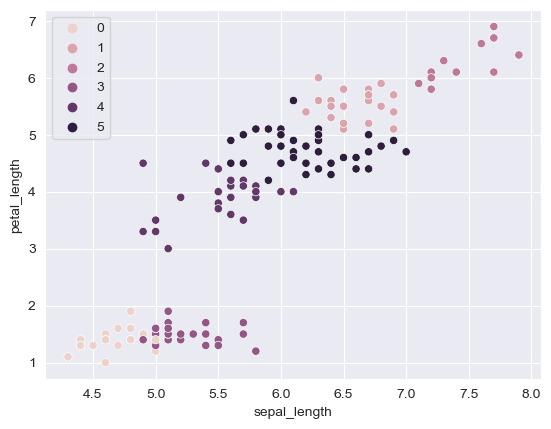

In [137]:
sns.scatterplot(data=X, x='sepal_length', y='petal_length', hue=preds);

In most real-world scenarios, there's no predetermined number of clusters. In such a case, you can create a plot of "No. of clusters" vs "Inertia" to pick the right number of clusters.

/opt/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

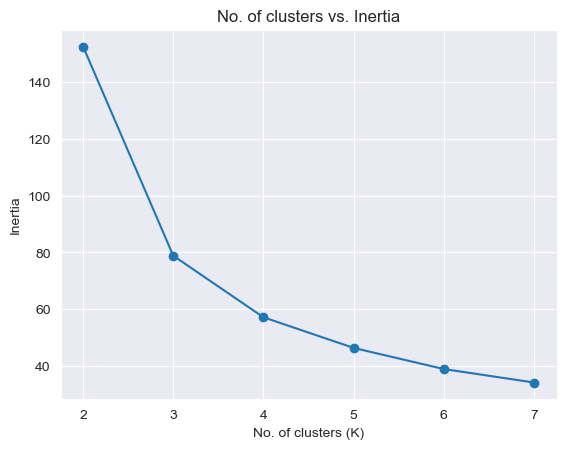

In [138]:
options = range(2,8)
inertias = []

for n_clusters in options:
    model = KMeans(n_clusters, random_state=42).fit(X)
    inertias.append(model.inertia_)
    
plt.title("No. of clusters vs. Inertia")
plt.plot(options, inertias, '-o')
plt.xlabel('No. of clusters (K)')
plt.ylabel('Inertia');

The chart creates an "elbow" plot, and you can pick the number of clusters beyond which the reduction in inertia decreases sharply.

**Silhouette Score Analysis**

The silhouette score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The score ranges from -1 to 1, where:
- A score close to 1 indicates the point is well-matched to its own cluster and poorly matched to neighboring clusters
- A score of 0 indicates the point is on or very close to the decision boundary between two neighboring clusters
- A negative score indicates that the point might have been assigned to the wrong cluster

We'll calculate the silhouette score for different numbers of clusters to find the optimal number.

/opt/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

Silhouette score for 2 clusters: 0.6810
Silhouette score for 3 clusters: 0.5528
Silhouette score for 4 clusters: 0.4981
Silhouette score for 5 clusters: 0.4912
Silhouette score for 6 clusters: 0.3648
Silhouette score for 7 clusters: 0.3543


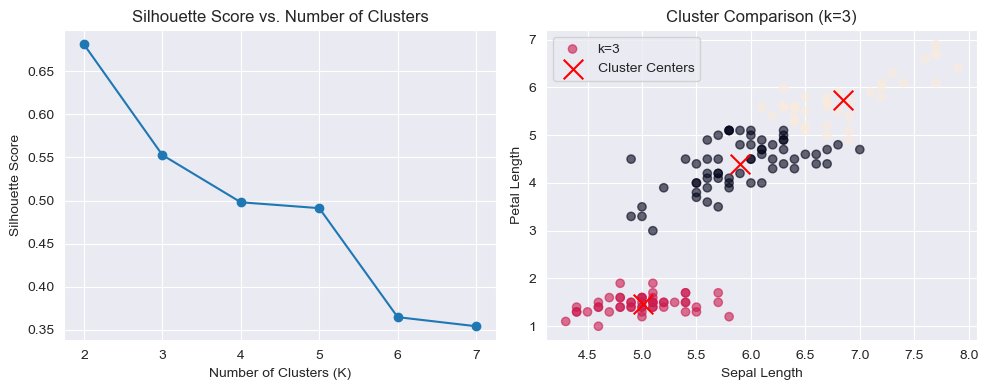

In [139]:
from sklearn.metrics import silhouette_score

# Calculate silhouette scores for different numbers of clusters
silhouette_scores = []

for n_clusters in options:
    model = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    score = silhouette_score(X, model.labels_)
    silhouette_scores.append(score)
    print(f"Silhouette score for {n_clusters} clusters: {score:.4f}")

# Plot the silhouette scores
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(options, silhouette_scores, '-o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)

# Visualize the clusters for k=3
plt.subplot(1, 2, 2)
for k in [3]:
    model = KMeans(n_clusters=k, random_state=42).fit(X)
    plt.scatter(X['sepal_length'], X['petal_length'], c=model.labels_, 
               alpha=0.6, label=f'k={k}')
    centers = model.cluster_centers_
    # Plot cluster centers with red X marks
    plt.scatter(centers[:, 0], centers[:, 2], c='red', marker='x', s=200, label='Cluster Centers')

plt.title('Cluster Comparison (k=3)')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()
plt.tight_layout()
plt.show()

In [140]:
X.columns   

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

#### Understanding the Silhouette Score Results

The silhouette score is highest for 2 clusters rather than 3, even though we know there are 3 iris species. Here's why this happens:

**Cluster Separation**: The Iris species are not perfectly separated in the feature space. 
   - Two of the species (versicolor and virginica) have significant overlap in their measurements
   - The setosa species is quite distinct from the other two

**What This Means**:
   - The silhouette score is telling us that the natural separation in the data is stronger between setosa vs. others, rather than between all three species
   - This is actually correct from a clustering perspective - two of the species are indeed very similar to each other
   - The "correct" number of clusters depends on what you're trying to achieve with your analysis

**Mini Batch K Means**: The K-means algorithm can be quite slow for really large dataset. Mini-batch K-means is an iterative alternative to K-means that works well for large datasets. Learn more about it here: https://scikit-learn.org/stable/modules/clustering.html#mini-batch-kmeans



> **EXERCISE**: Perform clustering on the [Mall customers dataset](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python) on Kaggle. Study the segments carefully and report your observations.

In [141]:
import os

In [142]:
mall_df = pd.read_csv("./Mall_Customers.csv")

In [143]:
mall_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [144]:
mall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [145]:
mall_df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

/opt/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


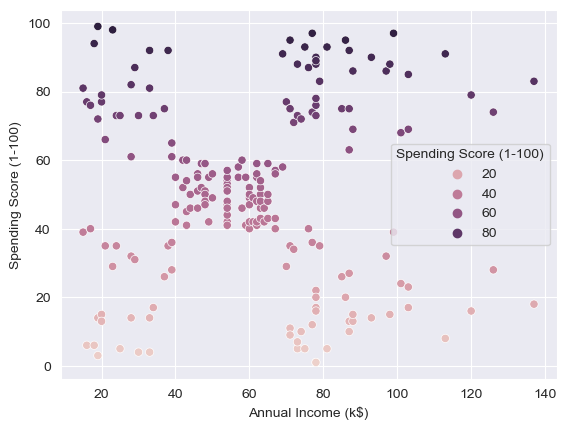

In [146]:
sns.scatterplot(data=mall_df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Spending Score (1-100)');

In [147]:
mall_model = KMeans(n_clusters=4, random_state=42)

In [148]:
mall_numeric_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [149]:
M = mall_df[mall_numeric_cols]

In [150]:
mall_model.fit(M)

/opt/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

In [151]:
mall_model.cluster_centers_

array([[44.89473684, 48.70526316, 42.63157895],
       [32.69230769, 86.53846154, 82.12820513],
       [24.82142857, 28.71428571, 74.25      ],
       [40.39473684, 87.        , 18.63157895]])

In [152]:
M

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


Clusters: 2, Silhouette Score: 0.293
Clusters: 3, Silhouette Score: 0.384
Clusters: 4, Silhouette Score: 0.405
Clusters: 5, Silhouette Score: 0.444
Clusters: 6, Silhouette Score: 0.452
Clusters: 7, Silhouette Score: 0.439
Clusters: 8, Silhouette Score: 0.433
Clusters: 9, Silhouette Score: 0.398
Clusters: 10, Silhouette Score: 0.382


/opt/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

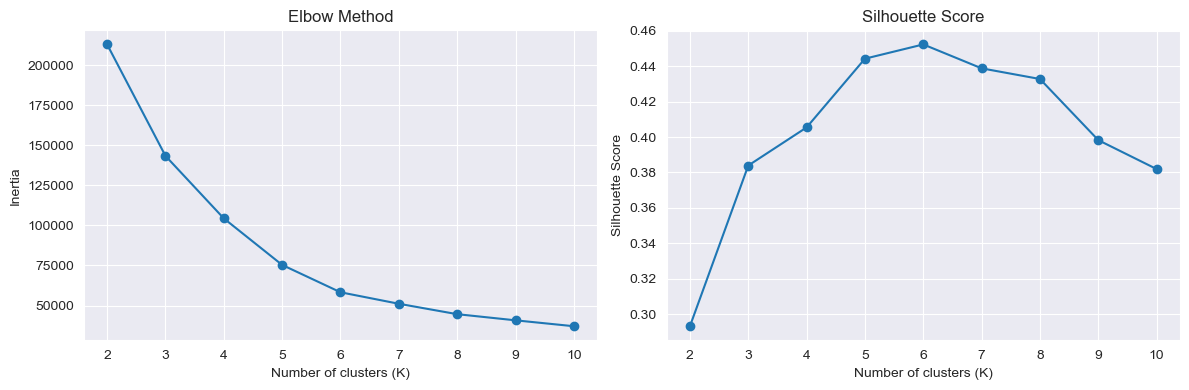

In [153]:
from sklearn.metrics import silhouette_score

options = range(2,11)
inertias = []
silhouette_scores = []

for n_clusters in options:
    # Fit KMeans
    model = KMeans(n_clusters, random_state=42).fit(M)
    inertias.append(model.inertia_)
    
    # Calculate Silhouette Score
    score = silhouette_score(M, model.labels_)
    silhouette_scores.append(score)
    print(f'Clusters: {n_clusters}, Silhouette Score: {score:.3f}')

# Plot Inertia
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(options, inertias, '-o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(options, silhouette_scores, '-o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.tight_layout()

In [154]:
model.inertia_

37128.00867935385

Cluster distribution:
Cluster 0: 45 samples
Cluster 1: 35 samples
Cluster 2: 22 samples
Cluster 3: 38 samples
Cluster 4: 39 samples
Cluster 5: 21 samples

Silhouette Score for 6 clusters: 0.452


/opt/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstanc

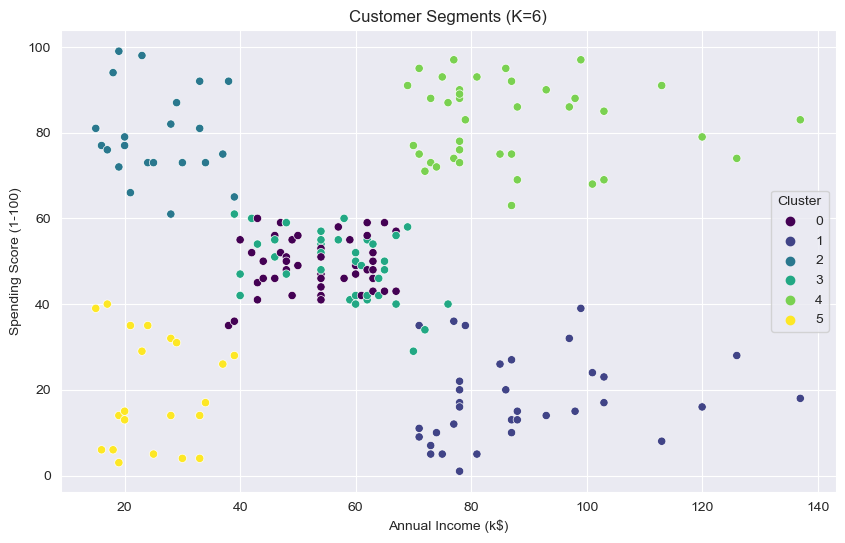

In [155]:
# Fit KMeans with optimal number of clusters
n_clusters = 6
model_kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(M)

# Get predictions
pred_m = model_kmeans.predict(M)

# Print cluster distribution
print("Cluster distribution:")
unique, counts = np.unique(pred_m, return_counts=True)
for cluster, count in zip(unique, counts):
    print(f"Cluster {cluster}: {count} samples")

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=M, x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue=pred_m, palette='viridis', legend='full')
plt.title(f'Customer Segments (K={n_clusters})')
plt.legend(title='Cluster')

# Calculate and print silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(M, pred_m)
print(f'\nSilhouette Score for {n_clusters} clusters: {silhouette_avg:.3f}')

### DBSCAN

Density-based spatial clustering of applications with noise (DBSCAN) uses the density of points in a region to form clusters. It has two main parameters: "epsilon" and "min samples" using which it classifies each point as a core point, reachable point or noise point (outlier).

#### Steps for DBSCAN Clustering:

![dbscan1](../assets/dbscan1.png)

1. **Choose Parameters**:
   - Select values for two parameters: `eps` (epsilon) and `MinPts` (minimum points).
     - `eps`: The radius of the neighborhood around a point.
     - `MinPts`: The minimum number of points required to form a dense region, i.e., for a point to be considered a core point.

2. **Identify Core Points, Border Points, and Noise**:
   - For each point in the dataset, count how many points fall within the `eps` neighborhood (including the point itself).
   - A point is labeled as a core point if at least `MinPts` points fall within its `eps` neighborhood.
   - A point is labeled as a border point if fewer than `MinPts` points fall within its `eps` neighborhood, but it is in the neighborhood of a core point.
   - A point is labeled as noise if it is neither a core point nor a border point.

3. **Form Clusters**:
   - For each core point, if it is not already assigned to a cluster, create a new cluster, and recursively add all points that are directly reachable from it in the `eps` neighborhood to the cluster.
   - Merge clusters if a core point is reachable from points in different clusters.

4. **Assign Border Points**:
   - Assign each border point to one of the clusters of its associated core points.

5. **Handle Noise**:
   - Points classified as noise are not assigned to any cluster. They can either be discarded or processed separately, depending on the context of the analysis.

#### Advantages:

- Does not require specifying the number of clusters beforehand.
- Can find arbitrarily shaped clusters.
- Robust to outliers.
- Has a notion of noise.

#### Disadvantages:

- Can struggle with clusters of varying densities.
- The quality of clustering depends heavily on the choice of parameters `eps` and `MinPts`.
- If the data and dimensionality are very high, it may be computationally expensive to compute all the neighborhoods.

Here's a video explaining how the DBSCAN algorithm works: https://www.youtube.com/watch?v=C3r7tGRe2eI


In [156]:
from sklearn.cluster import DBSCAN

In [157]:
?DBSCAN

Init signature:
DBSCAN(
    eps=0.5,
    *,
    min_samples=5,
    metric='euclidean',
    metric_params=None,
    algorithm='auto',
    leaf_size=30,
    p=None,
    n_jobs=None,
)
Docstring:     
Perform DBSCAN clustering from vector array or distance matrix.

DBSCAN - Density-Based Spatial Clustering of Applications with Noise.
Finds core samples of high density and expands clusters from them.
Good for data which contains clusters of similar density.

Read more in the :ref:`User Guide <dbscan>`.

Parameters
----------
eps : float, default=0.5
    The maximum distance between two samples for one to be considered
    as in the neighborhood of the other. This is not a maximum bound
    on the distances of points within a cluster. This is the most
    important DBSCAN parameter to choose appropriately for your data set
    and distance function.

min_samples : int, default=5
    The number of samples (or total weight) in a neighborhood for a point
    to be considered as a core point. T

In [158]:
model = DBSCAN(eps=0.6, min_samples=4)

In [159]:
model.fit(X)

DBSCAN(eps=0.6, min_samples=4)

In DBSCAN, there's no prediction step. It directly assigns labels to all the inputs.

In [160]:
model.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  2,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  2,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

/opt/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


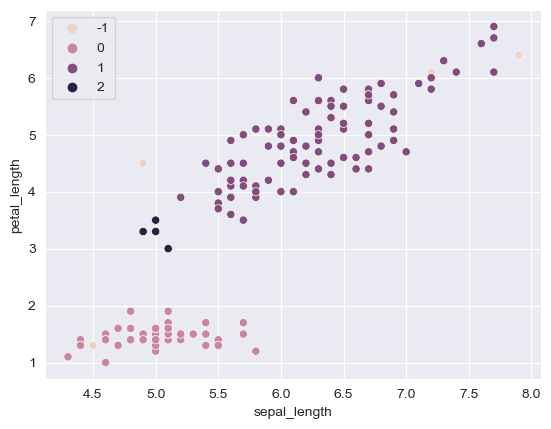

In [161]:
sns.scatterplot(data=X, x='sepal_length', y='petal_length', hue=model.labels_);

> **EXERCISE**: Try changing the values of `eps` and `min_samples` and observe how the number of clusters the classification changes.

Here's how the results of DBSCAN and K Means differ:

<img src="https://miro.medium.com/max/1339/0*xu3GYMsWu9QiKNOo.png" width="640">

### Hierarchical Clustering

Hierarchical clustering, as the name suggests, creates a hierarchy or a tree of clusters.

<img src="https://dashee87.github.io/images/hierarch.gif" width="640">

While there are several approaches to hierarchical clustering, the most common approach works as follows:

#### Steps for Agglomerative Hierarchical Clustering:

1. **Start by Assigning Each Data Point to Its Own Cluster**:
   - If you have `N` data points, you start with `N` clusters, each containing just one data point.

2. **Compute the Proximity Matrix**:
   - Calculate the distance between each pair of clusters. There are various distance metrics that can be used, such as Euclidean, Manhattan, or Cosine distance. The choice of distance metric depends on the nature of the data.

3. **Merge the Closest Pair of Clusters**:
   - Find the two clusters that are closest to each other and combine them into a single cluster. As a result, the number of clusters decreases by one.

4. **Update the Proximity Matrix**:
   - After merging two clusters, the proximity matrix needs to be updated to reflect the distances between the new cluster and the original clusters. The method for updating the matrix depends on the linkage criterion:
     - **Single Linkage (MIN)**: Distance between two clusters is the minimum distance between any single data point in the first cluster and any single data point in the second cluster.
     
       $$ d(A,B) = \min_{a \in A, b \in B} d(a, b) $$
       
     - **Complete Linkage (MAX)**: Distance between two clusters is the maximum distance between any single data point in the first cluster and any single data point in the second cluster.
     
       $$ d(A,B) = \max_{a \in A, b \in B} d(a, b) $$
       
     - **Average Linkage**: Distance between two clusters is the average distance between each data point in the first cluster and every data point in the second cluster.
     
       $$ d(A,B) = \frac{1}{|A| \cdot |B|} \sum_{a \in A} \sum_{b \in B} d(a, b) $$
       
     - **Ward's Method**: Distance between two clusters is the increase in the total within-cluster variance after merging them, which is equivalent to the squared Euclidean distance between cluster means.
     
       $$ d(A,B) = \sum_{i=1}^{n} (x_{iA} - x_{iB})^2 $$
       
     where $x_{iA}$ and $x_{iB}$ are the means of clusters $A$ and $B$ for variable $i$, and $n$ is the number of variables.

5. **Repeat Steps 3 and 4**:
   - Continue merging the closest pair of clusters and updating the proximity matrix until all data points are clustered into a single cluster that contains all observations.

6. **Construct a Dendrogram**:
   - A dendrogram is a tree-like diagram that records the sequences of merges or splits. It provides a visual summary of the clustering process, showing the order of cluster combinations and the distance at which each merge occurred.

Hierarchical clustering doesn't require specifying the number of clusters beforehand, but it can be determined by cutting the dendrogram at a desired level. The choice of where to cut the dendrogram depends on the problem context or a predetermined threshold distance.

![hierarchical](../assets/hierarchical.png)

#### Advantages:

1. **No Need to Specify Number of Clusters**: You do not need to specify the number of clusters beforehand. The number of clusters can be determined by cutting the dendrogram at the desired level.
2. **Dendrogram**: Provides a visual representation of the clustering process, which can be informative.
3. **Flexibility**: Can create clusters of various shapes and sizes, not limited to spherical clusters like K-Means.
4. **Easy to Merge/Split Clusters**: The hierarchical nature allows for easy merging or splitting of clusters based on the hierarchy.

#### Disadvantages:

1. **Computational Complexity**: The time complexity for the standard algorithm is typically O(n^2 log n) or O(n^3), which can be prohibitive for large datasets.
2. **Irreversible**: Once a decision is made to combine two clusters, it cannot be undone without restarting the entire process.
3. **Sensitivity to Noise and Outliers**: Similar to K-Means, hierarchical clustering can be sensitive to noise and outliers, which can lead to misinterpretations of the data structure.
4. **Choice of Linkage Criteria**: The results can be significantly different based on the choice of linkage criteria (single, complete, average, etc.), and there is no objective way to choose the best method.

Watch this video for a visual explanation of hierarchical clustering: https://www.youtube.com/watch?v=7xHsRkOdVwo

> **EXERCISE**: Implement hierarchical clustering for the Iris dataset using `scikit-learn`.

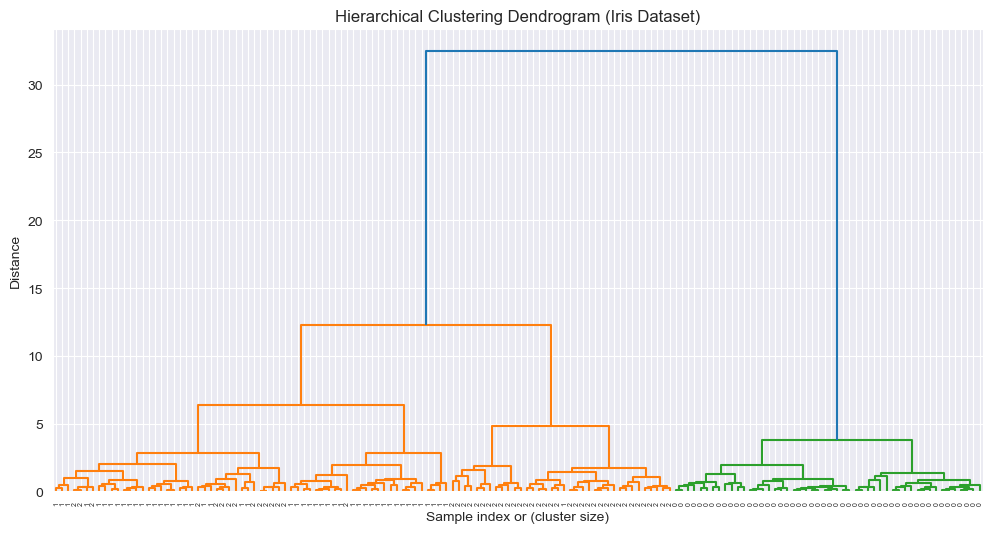

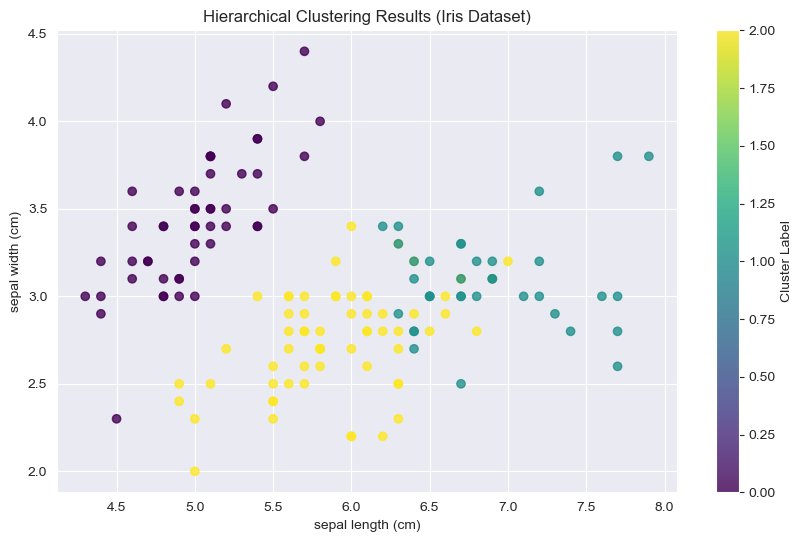

Cluster sizes: [50 36 64]
Silhouette Score: 0.5543


In [162]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # True labels (for comparison)

# Perform hierarchical clustering
linked = linkage(X, 'ward')  # Using Ward's method for linkage

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', labels=y, distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Iris Dataset)')
plt.xlabel('Sample index or (cluster size)')
plt.ylabel('Distance')
plt.show()

# Cut the dendrogram to get cluster labels
num_clusters = 3  # We know there are 3 species in Iris dataset
cluster_labels = fcluster(linked, t=num_clusters, criterion='maxclust') - 1  # Convert to 0-based index

# Visualize the clusters using the first two features
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', alpha=0.8)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Hierarchical Clustering Results (Iris Dataset)')
plt.colorbar(scatter, label='Cluster Label')
plt.show()

# Print cluster sizes
print("Cluster sizes:", np.bincount(cluster_labels))

# Calculate silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.4f}")



## Summary and References

<img src="https://i.imgur.com/DZSXb0m.jpeg" width="640">

The following topics were covered in this tutorial:

- Overview of unsupervised learning algorithms in Scikit-learn
- Clustering algorithms: K Means, DBScan, Hierarchical clustering etc.
- Dimensionality reduction (PCA) and manifold learning (t-SNE)


Check out these resources to learn more:

- https://www.coursera.org/learn/machine-learning
- https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/
- https://scikit-learn.org/stable/unsupervised_learning.html
- https://scikit-learn.org/stable/modules/clustering.html